**** MINOR PROJECT ****

** Student Analysis **

    PROBLEM STATEMENT
    ----------------------------------------------
    ----------------------------------------------
    gender                                     : Gender of the student
    race/ethnicity                             : Race of the Student As Group A/B/C
    parental level of education                : What is the education Qualification of Students Parent
    lunch                                      : Whether the lunch is Standard type/Free lunch or Some discounted lunch
    test preparation course                    : Whether Student has Taken or not and Completed
    math score                                 : Scores in Maths
    reading score                              : Scores in Reading
    writing score                              : Scores in Writing

    Objective of this Analysis:
    ----------------------------------------------
    To understand the how the student's performance (test scores) is affected by the other variables 
    (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course).

    What to do in  Exploratory Data Analysis:
    ----------------------------------------------
    1. To Analyse insights in the dataset.
    2. To understand the connection between the variables and to uncover the underlying structure
    3. To extract the important Variables.
    4. To test the underlying assumptions.
    5. Provide Insights with Suitable Graphs and Visualizations.
    6. Write all your inferences with supporting Analysis and Visualizations.

**** SOLUTION ****

In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the .csv file (data-set) assigned

data = pd.read_csv("StudentsPerformance (1).csv")

# ensuring the read was successful

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# checking out the shape (dimensions) of the dataset to gain some visual imagery

data.shape

(1000, 8)

In [4]:
# checking if the data has any missing values

data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

    Conclusion : There are NO missing values in the dataset

In [6]:
# analysing the datatype of all the column values

data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [18]:
# analyzing the values of each column

print(data['gender'].value_counts())
print('\n-------------------------\n')
print(data['parental level of education'].value_counts())
print('\n-------------------------\n')
print(data['race/ethnicity'].value_counts())
print('\n-------------------------\n')
print(data['lunch'].value_counts())
print('\n-------------------------\n')
print(data['test preparation course'].value_counts())

female    518
male      482
Name: gender, dtype: int64

-------------------------

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

-------------------------

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

-------------------------

standard        645
free/reduced    355
Name: lunch, dtype: int64

-------------------------

none         642
completed    358
Name: test preparation course, dtype: int64


    Analysing the values of each column,
    We can conclude that,
    1. Categorical Variables:
        - gender
        - parental level of education
        - race/ethnicity
        - lunch
        - test preparation course
    2. Numerical Variables:
        - math score
        - reading score
        - writing score

In [9]:
# now, we add two columns, namely 'total' and 'average'

data['total'] = data['math score'] + data['reading score'] + data['writing score']

data['average'] = data['total'] / 3

    Visualization of the distribution of various scores and column data

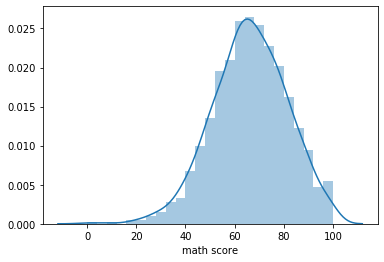

In [10]:
# to see the distribution of scores (math)
sns.distplot(data['math score'])

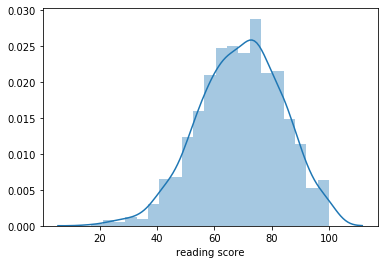

In [11]:
# to see the distribution of scores (reading)

sns.distplot(data['reading score'])

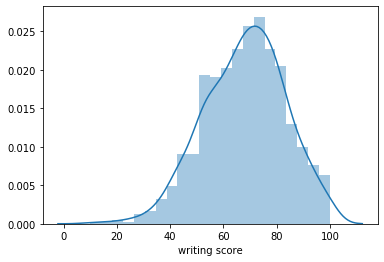

In [12]:
# to see the distribution of scores (writing)

sns.distplot(data['writing score'])

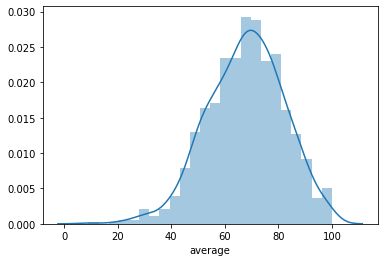

In [13]:
# to see the distribution of 'average'

sns.distplot(data['average'])

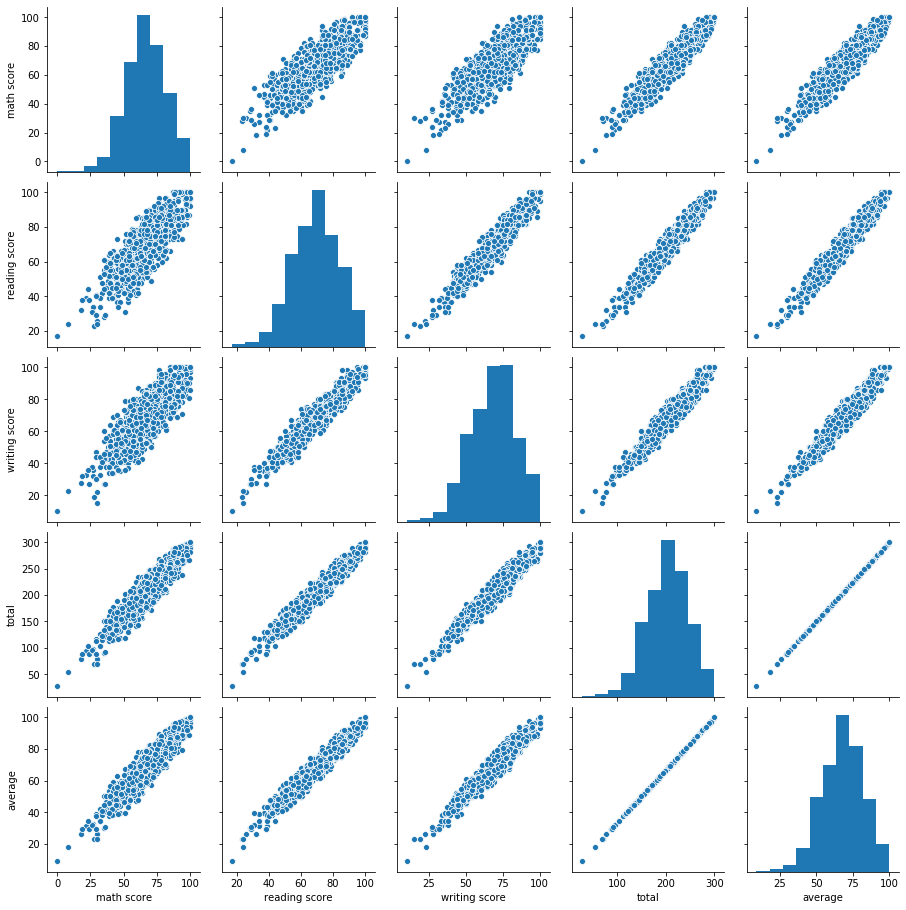

In [14]:
# pairplotting all the column entries

sns.pairplot(data)

    Analyzing the average score on the basis of race/ethnicity, parental level of education, test preparation course

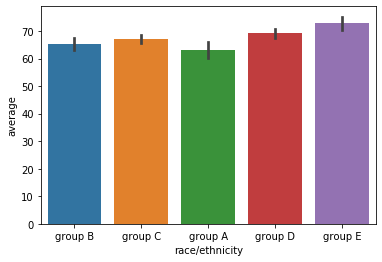

In [15]:
# average vs race/ethnicity

sns.barplot(data['race/ethnicity'], data['average'])

[Text(0, 0, "bachelor's degree"),
 Text(0, 0, 'some college'),
 Text(0, 0, "master's degree"),
 Text(0, 0, "associate's degree"),
 Text(0, 0, 'high school'),
 Text(0, 0, 'some high school')]

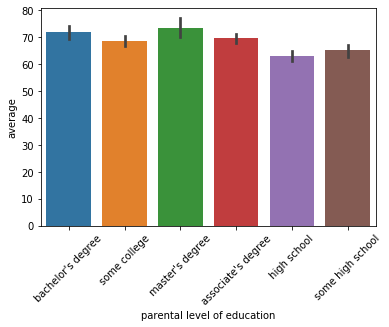

In [20]:
# average vs parental level of education

chart = sns.barplot(data['parental level of education'], data['average'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

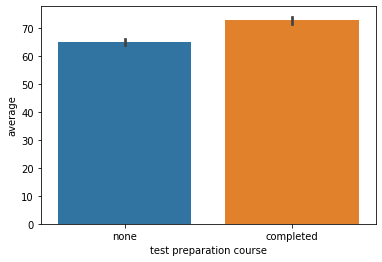

In [17]:
# average vs test preparation course

sns.barplot(data['test preparation course'], data['average'])

    Analyzing the data on the basis of the number of students who failed or passed the subject.

In [21]:
# creating separate columns for each subject's 'pass status'

data['math_PassStatus'] = np.where(data['math score'] < 40, 'F', 'P')
data['reading_PassStatus'] = np.where(data['reading score'] < 40, 'F', 'P')
data['writing_PassStatus'] = np.where(data['writing score'] < 40, 'F', 'P')

In [22]:
# Pass Status - Math

data['math_PassStatus'].value_counts()

P    960
F     40
Name: math_PassStatus, dtype: int64

In [23]:
# Pass Status - Reading

data['reading_PassStatus'].value_counts()

P    974
F     26
Name: reading_PassStatus, dtype: int64

In [24]:
# Pass Status - Writing

data['writing_PassStatus'].value_counts()

P    968
F     32
Name: writing_PassStatus, dtype: int64

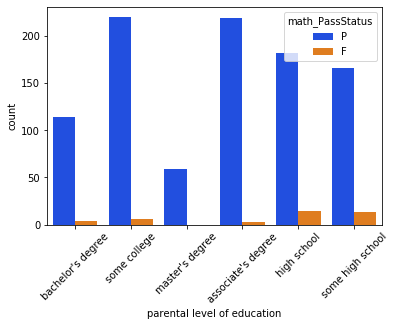

In [26]:
# math_PassStatus vs parental level of education

p = sns.countplot(x = 'parental level of education', data = data, hue = 'math_PassStatus', palette = 'bright')
_ = plt.setp(p.get_xticklabels(), rotation = 45)

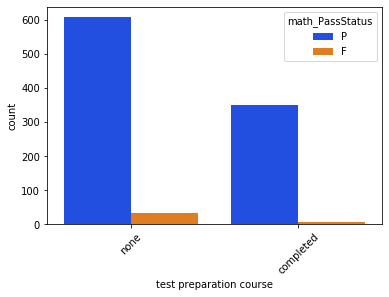

In [27]:
# math_PassStatus vs test preparation course

p = sns.countplot(x = 'test preparation course', data = data, hue = 'math_PassStatus', palette = 'bright')
_ = plt.setp(p.get_xticklabels(), rotation = 45)

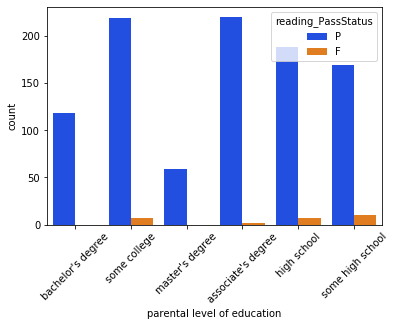

In [29]:
# reading_PassStatus vs parental level of education

p = sns.countplot(x = 'parental level of education', data = data, hue = 'reading_PassStatus', palette = 'bright')
_ = plt.setp(p.get_xticklabels(), rotation = 45)

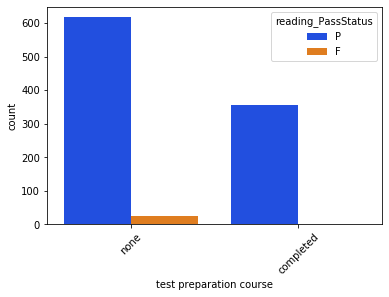

In [30]:
# reading_PassStatus vs test preparation course

p = sns.countplot(x = 'test preparation course', data = data, hue = 'reading_PassStatus', palette = 'bright')
_ = plt.setp(p.get_xticklabels(), rotation = 45)

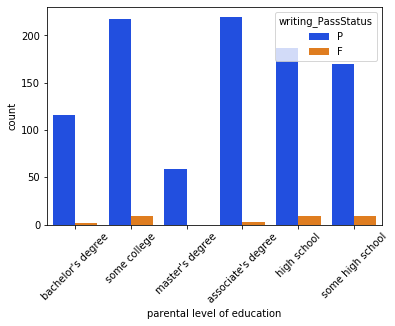

In [32]:
# writing_PassStatus vs parental level of education

p = sns.countplot(x = 'parental level of education', data = data, hue = 'writing_PassStatus', palette = 'bright')
_ = plt.setp(p.get_xticklabels(), rotation = 45)

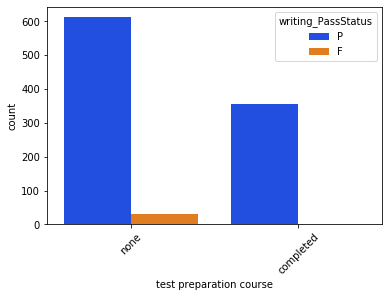

In [31]:
# writing_PassStatus vs test preparation course

p = sns.countplot(x = 'test preparation course', data = data, hue = 'writing_PassStatus', palette = 'bright')
_ = plt.setp(p.get_xticklabels(), rotation = 45)

**** End of Analysis ****

Reference : medium.com/israjan/